# Sentiment Analysis

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('C:/Users/Hp/OneDrive/Desktop/Internship/training.1600000.processed.noemoticon.csv', encoding = "latin-1", header=None)

In [3]:
df.columns = ['Labels' , 'User_ID' , 'Date' , 'Flag' , 'User_Name' , 'Text']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Labels     1600000 non-null  int64 
 1   User_ID    1600000 non-null  int64 
 2   Date       1600000 non-null  object
 3   Flag       1600000 non-null  object
 4   User_Name  1600000 non-null  object
 5   Text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df.head()

,Labels,User_ID,Date,Flag,User_Name,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.tail()

,Labels,User_ID,Date,Flag,User_Name,Text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [7]:
df.isnull().any()

Labels       False
User_ID      False
Date         False
Flag         False
User_Name    False
Text         False
dtype: bool

In [8]:
df.shape

(1600000, 6)

In [9]:
df = df[['Text' , 'Labels']]

In [10]:
df.head()

,Text,Labels
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [11]:
df['Labels'][df['Labels']==4]=1

In [12]:
df_pos = df[df['Labels'] == 1]
df_neg = df[df['Labels'] == 0]

In [13]:
df_pos = df_pos.iloc[:int(20000)]
df_neg = df_neg.iloc[:int(20000)]

In [14]:
df_pos.shape , df_neg.shape

((20000, 2), (20000, 2))

In [15]:
df = pd.concat([df_pos, df_neg])

In [16]:
df['Text']=df['Text'].str.lower()

In [17]:
df['Text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: Text, dtype: object

In [18]:
stopwords_CR = stopwords.words('english')

In [19]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [20]:
STOPWORDS = set(stopwords.words('english'))
def CSW(Text):
    return " ".join([word for word in str(Text).split() if word not in STOPWORDS])
df['Text'] = df['Text'].apply(lambda Text: CSW(Text))
df['Text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: Text, dtype: object

In [21]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def CP(Text):
    translator = str.maketrans('', '', punctuations_list)
    return Text.translate(translator)

In [22]:
df['Text']= df['Text'].apply(lambda x: CP(x))
df['Text'].tail()

19995    much time weekend work trip malmï¿½ frisat tod...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999     threw sign donnie bent get thingee made sad face
Name: Text, dtype: object

In [23]:
def CRC(Text):
    return re.sub(r'(.)\1+', r'\1', Text)

In [24]:
df['Text'] = df['Text'].apply(lambda x: CRC(x))
df['Text'].tail()

19995    much time wekend work trip malmï¿½ frisat toda...
19996                                     one day holidays
19997                       feling right hate damn humprey
19998    gezi hv read whole bok personality types embar...
19999       threw sign donie bent get thinge made sad face
Name: Text, dtype: object

In [25]:
def CEM(df):
    return re.sub('@[^\s]+', ' ', df)

In [26]:
df['Text']= df['Text'].apply(lambda x: CEM(x))
df['Text'].tail()

19995    much time wekend work trip malmï¿½ frisat toda...
19996                                     one day holidays
19997                       feling right hate damn humprey
19998    gezi hv read whole bok personality types embar...
19999       threw sign donie bent get thinge made sad face
Name: Text, dtype: object

In [27]:
def CURL(df):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',df)

In [28]:
df['Text'] = df['Text'].apply(lambda x: CURL(x))
df['Text'].tail()

19995    much time wekend work trip malmï¿½ frisat toda...
19996                                     one day holidays
19997                       feling right hate damn humprey
19998    gezi hv read whole bok personality types embar...
19999       threw sign donie bent get thinge made sad face
Name: Text, dtype: object

In [29]:
def CN(df):
    return re.sub('[0-9]+', '', df)

In [30]:
df['Text'] = df['Text'].apply(lambda x: CN(x))
df['Text'].tail()

19995    much time wekend work trip malmï¿½ frisat toda...
19996                                     one day holidays
19997                       feling right hate damn humprey
19998    gezi hv read whole bok personality types embar...
19999       threw sign donie bent get thinge made sad face
Name: Text, dtype: object

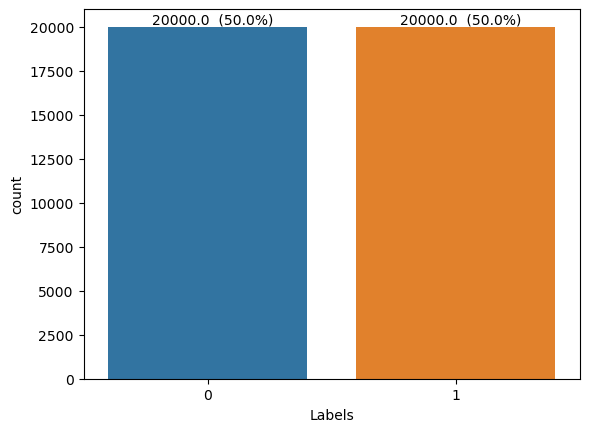

In [31]:
ax = sns.countplot(x=df['Labels'])
for p in ax.patches:
    ax.annotate('{:.1f}  ({:.1f}%)'.format(p.get_height(),(p.get_height()/len(df)*100)),
                (p.get_x()+.175, p.get_height()+(p.get_height()*0.01)))

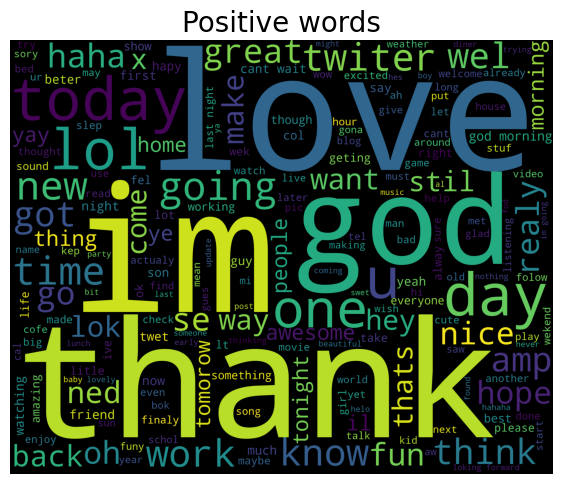

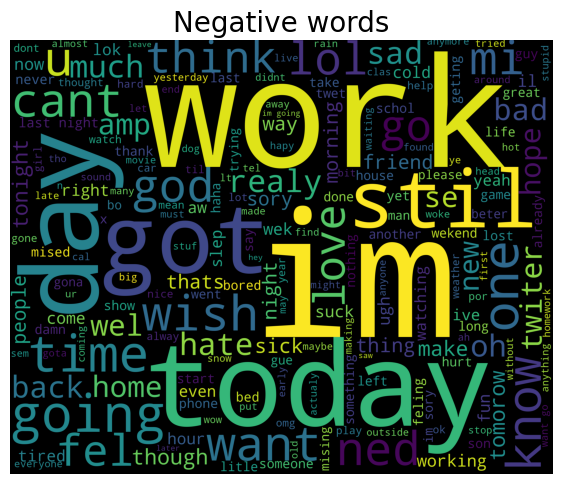

In [32]:
def wordcloud_draw(df, color, title):
    words = ' '.join(df)
    wordcloud = WordCloud(background_color='black',width=2500,height=2000).generate(words)
    plt.figure(figsize=(7, 7))
    plt.imshow(wordcloud)
    plt.title(title, fontsize=20)
    plt.axis('off')

wordcloud_draw(df['Text'][df['Labels']==1],'black','Positive words')
wordcloud_draw(df['Text'][df['Labels']==0], 'black', 'Negative words')

In [33]:
tf_idf = TfidfVectorizer()
x_train = tf_idf.fit_transform(df['Text'])
y_train= df['Labels']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [35]:
tree = DecisionTreeClassifier(max_depth =3, random_state = 42)
tree.fit(X_train, y_train)

tree_pred = tree.predict(X_test)

In [37]:
rtree = RandomForestClassifier(n_estimators = 100) 
rtree.fit(X_train, y_train)

rtree_pred = rtree.predict(X_test)

In [39]:
def eval(y_pred):
    print("Accuracy of tree model: {}".format(accuracy_score(y_test, y_pred))+"\n\n")
    print("Classification report of tree model: \n{}".format(classification_report(y_test, y_pred))+"\n\n")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="")

Accuracy of tree model: 0.5253787878787879


Classification report of tree model: 
              precision    recall  f1-score   support

           0       0.92      0.05      0.10      6581
           1       0.51      1.00      0.68      6619

    accuracy                           0.53     13200
   macro avg       0.72      0.52      0.39     13200
weighted avg       0.72      0.53      0.39     13200





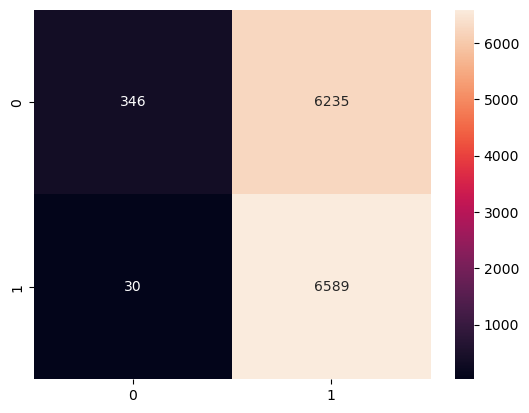

In [40]:
eval(tree_pred)

Accuracy of tree model: 0.7317424242424242


Classification report of tree model: 
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      6581
           1       0.73      0.73      0.73      6619

    accuracy                           0.73     13200
   macro avg       0.73      0.73      0.73     13200
weighted avg       0.73      0.73      0.73     13200





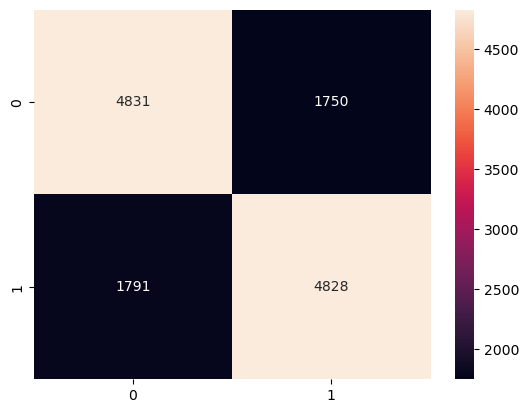

In [41]:
eval(rtree_pred)